# Explore the dataset augmentation function

This notebook showcases how to use the `augment_dataset()` function, which is part of the `image_augmentator` library. 

The `augment_dataset()` function takes as an input a [manifest file](https://docs.aws.amazon.com/sagemaker/latest/dg/sms-input-data-input-manifest.html) with annotation details about the images of a dataset. Manifest files are JSON lines objects, with one line corresponding to one image. It then augments all the images while also generating a new manifest file for the augmented dataset. 

The manifest file can be located either locally or in S3. 3 types of tasks are supported by the `augment_dataset()` function: 

- Object detection (bounding boxes)
- Image classification (single label)
- Image classification (multi-label)

The following example demonstrates how to use the `augment_dataset()` function for an object detection task, on a small local dataset. If the same dataset was located in Amazon S3, the functionality would be exactly the same, with the difference of providing S3 URIs instead of local paths.

The toy dataset consists of two images from the [Computer vision in retail workshop dataset](https://github.com/aws-samples/computer-vision-retail-workshop/tree/main/dataset), licensed under the Creative Commons Attribution-ShareAlike 4.0 International License. First, import some required libraries and list the categories available in the dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('seaborn')

In [3]:
# names of the 10 products included in the toy dataset
CLASS_NAMES = [
    'flakes',  
    'mm', 
    'coke', 
    'spam', 
    'nutella', 
    'doritos', 
    'ritz', 
    'skittles', 
    'mountaindew', 
    'evian'
]

Run the cell below to take a look at our manifest file for the toy dataset.

In [ ]:
%cat images/toy-dataset.manifest

In the following cell we define the augmentation parameters that will be applied to the whole dataset. Bear in mind that you don't need to provide values for all the parameters. Only those that are relevant to your use case. You can use the `explore-image-augmentations.ipynb` notebook to understand the impact and the ranges of each of the augmentation parameters and decide which are applicable in your use case. 

In [4]:
dc_param = {}

dc_param['max_number_of_classes'] = len(CLASS_NAMES),
dc_param['how_many']=5,  # augmentation factor: how many images will be generated from one                    
dc_param['random_seed']=0,                  
dc_param['range_scale']=(0.75, 1.2),         
dc_param['range_translation']=(-50, 50),    
dc_param['range_rotation']=(-5, 5),         
dc_param['range_sheer']=(-5, 5),            
dc_param['range_noise']=(0, 0.001),         
dc_param['range_brightness']=(0.8, 1.5),    
dc_param['range_colorfulness']=(0, 2),
dc_param['range_color_temperature']=(-0.5, 1.5),
dc_param['range_compression']=(0, 100),
dc_param['flip_lr']='random',               
dc_param['flip_ud']=None,                
dc_param['enhance']=None,
dc_param['bbox_truncate'] = True,         
dc_param['bbox_discard_thr'] = 0.85, 

Next, create a destination folder for the augmented dataset and run the `augment_dataset` method with the parameters defined above.

In [5]:
# create a destination folder where the augmented dataset will be saved
!mkdir augmented_dataset

In [6]:
%load_ext autoreload
%autoreload 2

from util.image_augmentator import augment_dataset

stats = augment_dataset(
    uri_manifest_file='images/toy-dataset.manifest',  # location of the input manifest file
    uri_destination='augmented_dataset',  # destination location where the augmented dataset will be saved
    ls_class_names = CLASS_NAMES,
    filename_postfix = '_augm_',
    include_original=True,
    verbose = True,
    **dc_param
)

Augmenting image 1 out of 2 [ 50.0 %]
Augmenting image 2 out of 2 [ 100.0 %]


Now let's run some code to understand what the image augmentation library has produced. First, print some basic statistics. The code below shows how many samples are found in the original dataset, and how many samples are found in the augmented dataset. It also shows how many samples are found in each dataset for every label.

In [7]:
# show the statistics of the augmented dataset
stats

{'original': {'n_samples': 2,
  'class_hist': array([2, 3, 2, 1, 3, 2, 3, 1, 3, 2])},
 'augmentations': {'n_samples': 12,
  'class_hist': array([12, 18, 12,  6, 18, 12, 18,  6, 18, 12])}}

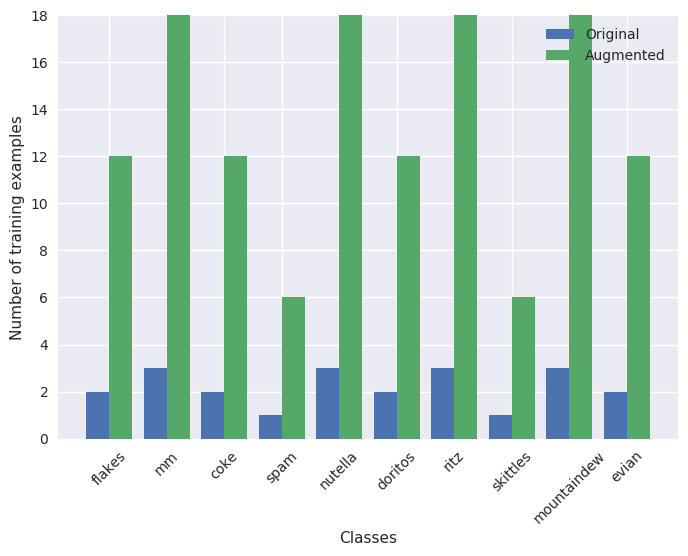

In [8]:
# compare the original dataset with the augmented one

X_axis = np.arange(len(CLASS_NAMES))

plt.figure()
plt.bar(
    x= X_axis- 0.2,
    height=stats['original']['class_hist'],
    width=0.4,
    label='Original'
)
plt.bar(
    x=X_axis + 0.2,
    height=stats['augmentations']['class_hist'],
    width=0.4,
    label='Augmented'
)
plt.xticks(X_axis, CLASS_NAMES, rotation=45)
plt.ylim([0, stats['augmentations']['class_hist'].max()])
plt.xlabel("Classes")
plt.ylabel("Number of training examples")
plt.legend()
plt.show()

## Conclusion

This example shows how easy it is to augment a whole image dataset, by calling the `augment_dataset()` function for an object detection task, on a small local dataset. If the same dataset was located in Amazon S3, the functionality would be exactly the same, with the difference of providing S3 URIs instead of local paths. 